In [31]:
#date, species, do I have a compiled version of the creatures?

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import dateutil

In [33]:
df =  pd.read_csv('Created CSVs/Cleaned_For_Analysis_Compressed_By_Day.csv')

In [34]:
df['Date'] =  [dateutil.parser.parse(date) for date in list(df['Date'])]

In [35]:
df['year'] = [x.year for x in df['Date']]

In [36]:
df['# Species Caught'] = [len(list(set(x.split(',')))) for x in df['Corrected Common Name']]

In [37]:
df['Day of the Year'] =  [x.timetuple().tm_yday for x in df['Date']]

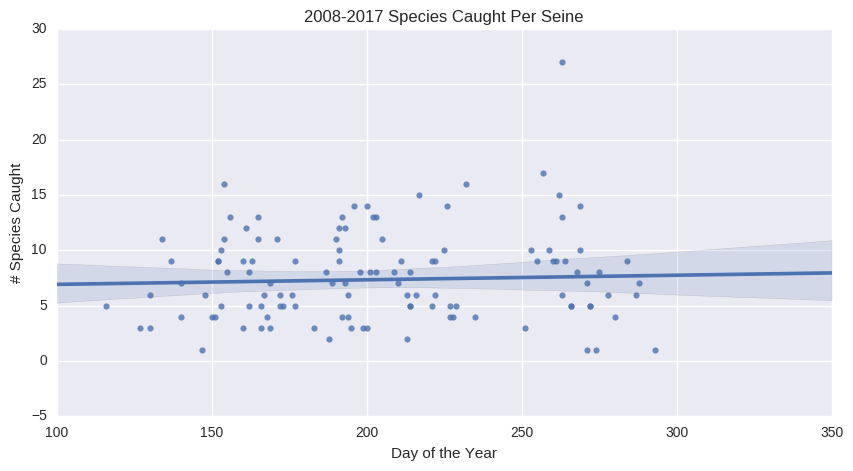

In [38]:
plt.figure(figsize=(10,5))
ax  = sns.regplot(df['Day of the Year'], df['# Species Caught'], ci = 95, robust = True)
ax.set_title('2008-2017 Species Caught Per Seine')
ax.figure.savefig('Graphs/BOP_2008_2017_Species_Caught_Per_Seine')

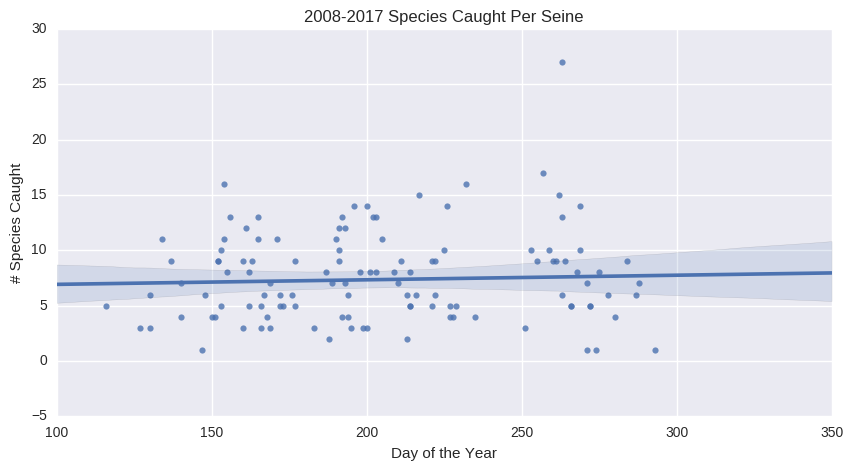

In [39]:
plt.figure(figsize=(10,5))
ax  = sns.regplot(df['Day of the Year'], df['# Species Caught'], ci = 95, robust = True)
ax.set_title('2008-2017 Species Caught Per Seine')
ax.figure.savefig('Graphs/BOP_2008_2017_Species_Caught_Per_Seine')

In [40]:
total_fish = []
for i,x in enumerate(list(df['Grouped Corrected Common Name'])):
    sum_fish = 0
    names = x.split(',')
    counts = list(df['Corrected Quantity'])[i].split(',')
    day_list =  zip(names, counts)
    for species in day_list:
        if species[0] != 'comb jelly':
            sum_fish += int(species[1])
    total_fish.append(sum_fish)

In [41]:
df['Total Organisms Caught'] = total_fish

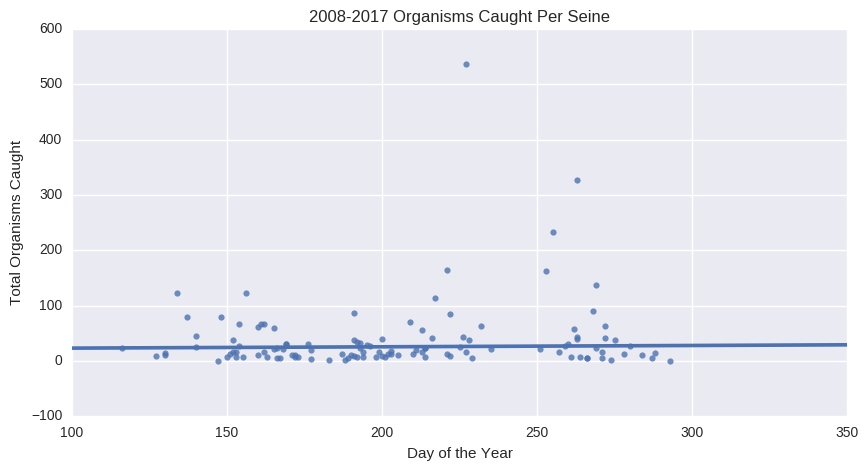

In [42]:
plt.figure(figsize=(10,5))
ax  = sns.regplot(df['Day of the Year'], df['Total Organisms Caught'],ci=False, robust=True)
ax.set_title('2008-2017 Organisms Caught Per Seine')


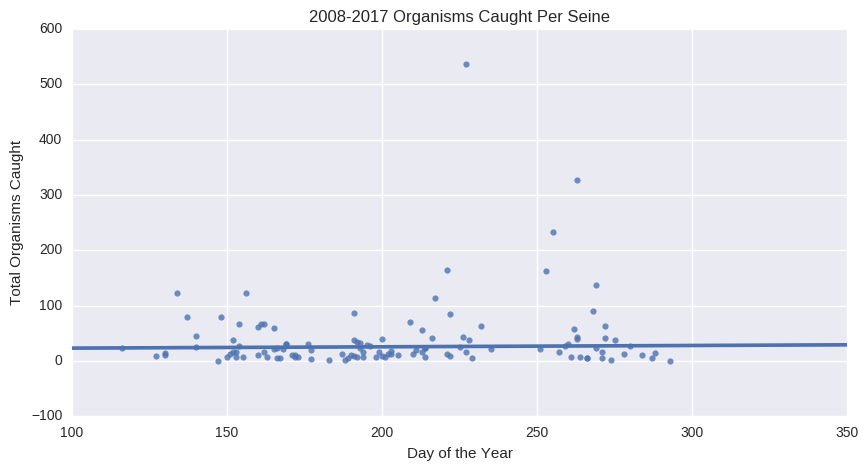

In [43]:
plt.figure(figsize=(10,5))
ax  = sns.regplot(df['Day of the Year'], df['Total Organisms Caught'],ci=False, robust=True)
ax.set_title('2008-2017 Organisms Caught Per Seine')

(0, 40)

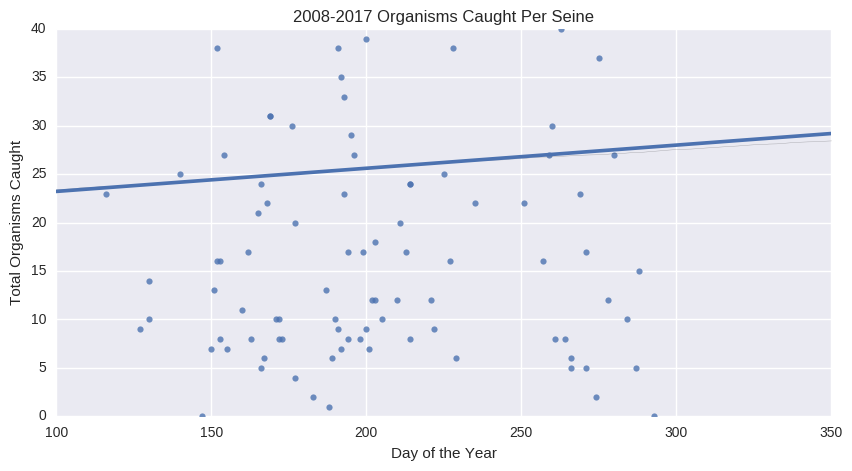

In [44]:
plt.figure(figsize=(10,5))
ax  = sns.regplot(df['Day of the Year'], df['Total Organisms Caught'],ci=False, robust = True)
ax.set_title('2008-2017 Organisms Caught Per Seine')
ax.set_ylim(0,40)


In [45]:
late_df = df[df['year']> 2010]

In [46]:
late_df[late_df['Total Organisms Caught'] < 1]['Common Name']

84    comb jelly
85    comb jelly
Name: Common Name, dtype: object

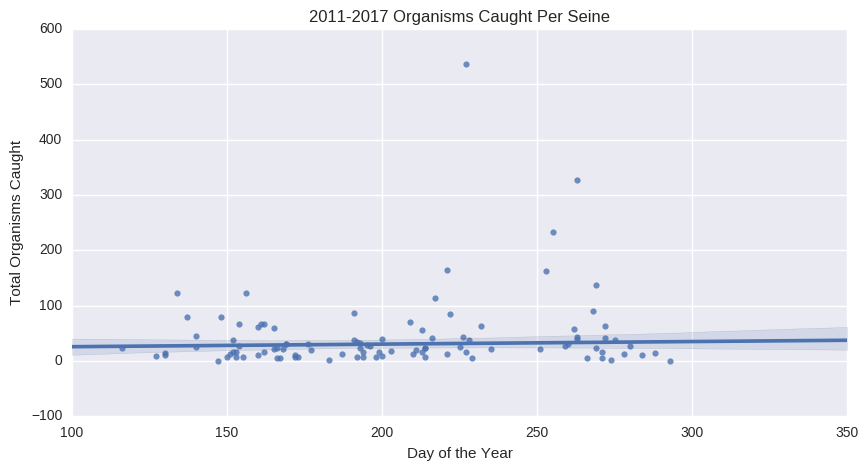

In [47]:
plt.figure(figsize=(10,5))
ax  = sns.regplot(late_df['Day of the Year'], late_df['Total Organisms Caught'], robust = True)
ax.set_title('2011-2017 Organisms Caught Per Seine')
#ax.set_ylim(0,40)
ax.figure.savefig('Graphs/BOP_2011_2017_Organisms_Caught_Per_Seine')

In [48]:
df_2017 = df[df['year'] == 2017]

In [49]:
df_2017['# Species Caught'] = [len(list(set(x.split(',')))) for x in df_2017['Corrected Common Name']]

/home/shad/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


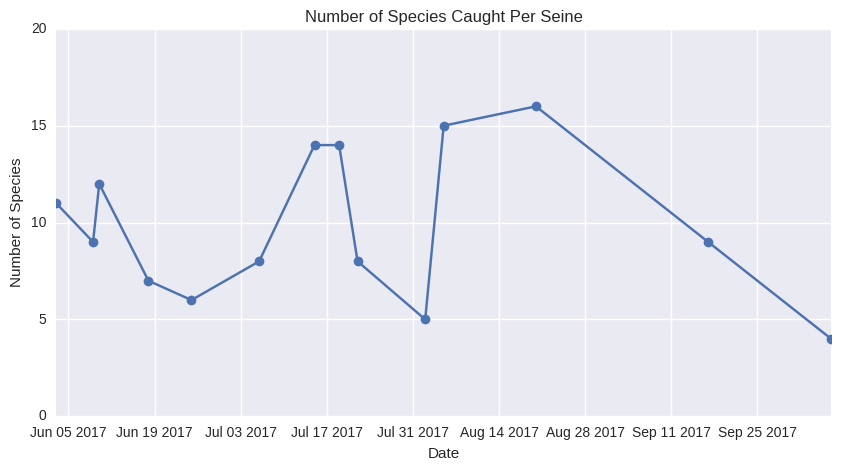

In [50]:
plt.figure(figsize=(10,5))
plt.title('Number of Species Caught Per Seine')
plt.xlabel('Date')
plt.ylabel('Number of Species')
plt.ylim(0,20)
ax = plt.plot(df_2017['Date'], df_2017['# Species Caught'], marker='o')
plt.savefig('Graphs/BOP_Line_2017_Species_Caught_Per_Seine')

In [51]:
df_2017['Day of the Year'] =  [x.timetuple().tm_yday for x in df_2017['Date']]

/home/shad/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


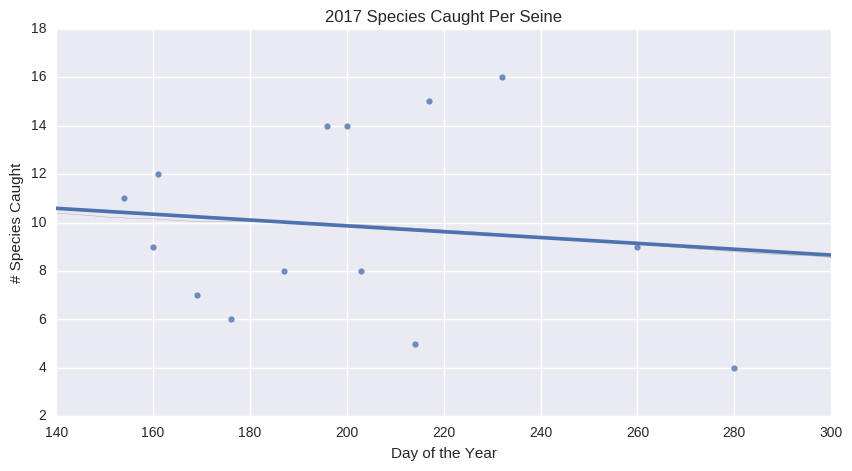

In [52]:
plt.figure(figsize=(10,5))
ax  = sns.regplot(df_2017['Day of the Year'], df_2017['# Species Caught'],ci=False)
ax.set_title('2017 Species Caught Per Seine')
ax.figure.savefig('Graphs/BOP_2017_Species_Caught_Per_Seine')

In [53]:
no_comb_df = df_2017[df_2017['Grouped Corrected Common Name'] != 'comb jelly']

In [54]:
total_fish = []
for i,x in enumerate(list(df_2017['Grouped Corrected Common Name'])):
    sum_fish = 0
    names = x.split(',')
    counts = list(df_2017['Corrected Quantity'])[i].split(',')
    day_list =  zip(names, counts)
    for species in day_list:
        if species[0] != 'comb jelly':
            sum_fish += int(species[1])
    total_fish.append(sum_fish)

   

In [55]:
df_2017['Sum Fish No Jellies'] = total_fish

/home/shad/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


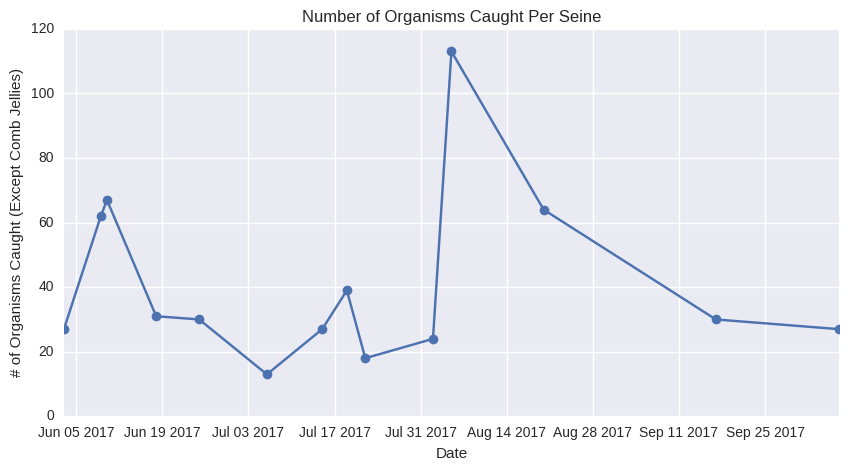

In [56]:
plt.figure(figsize=(10,5))
plt.title('Number of Organisms Caught Per Seine')
plt.xlabel('Date')
plt.ylabel('# of Organisms Caught (Except Comb Jellies)')
plt.plot(df_2017['Date'], df_2017['Sum Fish No Jellies'], marker='o')
plt.savefig('Graphs/BOP_Line_2017_Organisms_Caught_Per_Seine')

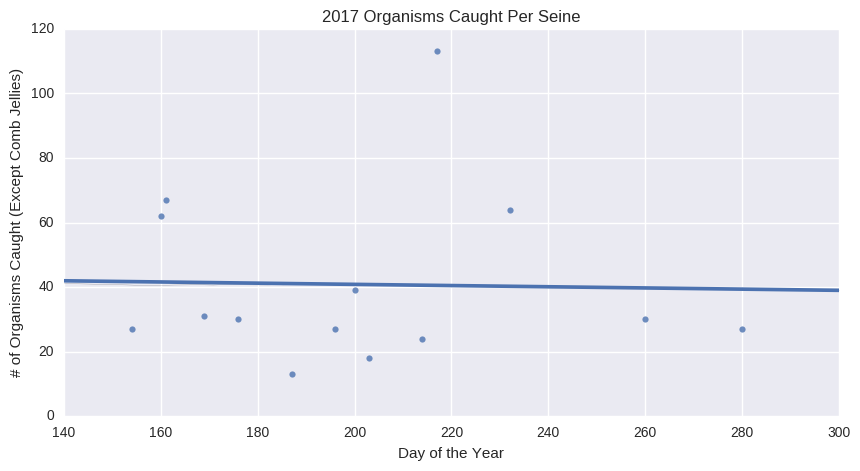

In [57]:
plt.figure(figsize=(10,5))
ax  = sns.regplot(df_2017['Day of the Year'], df_2017['Sum Fish No Jellies'],ci=False)
ax.set_title('2017 Organisms Caught Per Seine')
ax.set_ylabel('# of Organisms Caught (Except Comb Jellies)')
ax.figure.savefig('Graphs/BOP_2017_Organisms_Caught_Per_Seine')